# Avaliação de Risco de Crédito 

## 1.1 Contextualização

Você já precisou ir a um banco ou financeira para solicitar  um empréstimo? Por trás da resposta do atendente existem inúmeros processos complexos ocorrendo para garantir o melhor retorno ao branco. Avaliar se uma pessoa ou empresa irá cumprir a obrigação de pagamento é algo muito importante para as instituições financeiras, visto que, um erro de avaliação pode levar a grandes prejuízos para a empresa. 

A inadimplência, ou default¹,  representa a falta de cumprimento de uma obrigação, nesse caso, a falta de pagamento de algum empréstimo ou financiamento junto ao banco.
<img src="https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/rm208batch4-kwan-01-g.jpg?w=1300&dpr=1&fit=default&crop=default&q=80&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=fc27ff4fcdb3abc71a49741b50657a91">

Uma definição mais abrangente que a de Bessis é a adotada pelo O BCBS (Comitê da Basiléia sobre Supervisão Bancária) adota a seguinte definição de default
(2006, p. 100):

> Considera-se ter ocorrido default em relação a um devedor específico quando um ou ambos os
eventos seguintes tenham acontecido:
>
> * O banco considera improvável que o devedor pague na totalidade suas obrigações ao
conglomerado financeiro sem que este tenha que recorrer a ações tais como a realização de
garantias (se possuir);
>
> * O devedor está atrasado em mais de 90 dias em alguma obrigação material com o
conglomerado financeiro. Saques a descoberto são considerados como operações em atraso
quando o cliente infringir um limite recomendado ou tenha lhe sido recomendado um limite
menor que a dívida atual.

Devido a complexidade e importância do processo de avaliação de risco, cada vez mais, as instituições financeiras estão investindo em modelos de Machine Learning para garantir o melhor retorno sobre o investimento.

<i> 1 Embora possa haver alguma diferença entre os conceitos de default e inadimplência, neste projeto esses termos serão utilizados com o mesmo sentido.</i>

### 1.2 O projeto
Esse projeto tem o objetivo de fazer uma previsão de um determinado cliente ser inadimplênte. Para isso, será utilizado um conjunto de dados abertos de uma instituição financeira. Os dados passarão por um processamento e após isso um modelo de Machine Learning será desenvolvido para realizar as previsões.

### 1.3 A hipótese
Utilizando um conjunto de informações de um determinado cliente, seremos capaz de prever se o cliente, em seu primeiro contato com o banco, será um possível cliente default.!

### 2. Os dados
Os dados utilizados para esse projeto podem ser baixados aqui: [link para download](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0)

Também serão utilizadas algumas bibliotecas da linguagem python para realização do projeto.

In [1]:
import pandas as pd
import numpy as npa
!pip install seaborn -q

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sns.set_style('white')
import warnings
warnings.simplefilter("ignore")

Importando os dados para análise

In [3]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

### 3. Análise inicial
Nesse etapa faremos uma análise exploratória inicial dos dados para que auxile na tomada de decisão que serão necessárias na fase de processamento e limpeza dos dados. Além disso, essa fase nos permite avaliar e entender melhor como é o conjunto de dados que estamos lidando.

Verificando o tamanho do conjunto de dados - **entradas e variáveis.**

In [4]:
df.shape
print('O dataset possui {} entradas'.format(df.shape[0]))
print('O dataset possui {} variáveis'.format(df.shape[1]))

O dataset possui 45000 entradas
O dataset possui 43 variáveis


Verificando as <b> primeiras entradas  </b> do dataset. 

In [5]:
df.head(3)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


In [6]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

In [7]:
#describe para variáveis numéricas
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [8]:
#verificar os números únicos
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Nessa primeira visão do nosso conjunto de dados, podemos verificar alguns problemas logo de cara:

* limite de crédito e income com valor muito acima da média.
* n_accounts e n_issues com valores muito semelhantes.
* external_data_provider_credit_checks_last_2_year só possui valores '0'
* valor -999.00000 para external_data_provider_email_seen_before	
* reported_income com valores infinitos e NaN
* coluna user_agent que possui varias informações agrupadas sobre o navegador/sistema operacional
* Dados máscarados
  * Score_1 e 2
  * Reason
  * Informações pessoais: zip,state, job_name, channel.
  * coluna lat e long agrupadas na mesma
  * target_fraud, não há infos relevantes para identificar a utilidade da coluna
  * profile_tag


Variáveis categóricas como:
  * Target_fraud
  * real_state
  * marketing_channel
  * last_borrowed_in_months
  * facebook_profile 
  * external_data_provider_credit_checks_last_month/year

Variável alvo:
  * target_default

### 4. Tratando os dados

In [9]:
df_clean = df.copy()

# tratar dados os dados númericos - reported_income - valores infinitos e NaN
df_clean.reported_income = df_clean.reported_income.replace(np.inf, np.nan)
df_clean.replace(-999.000000, df_clean['external_data_provider_email_seen_before'].mean(), inplace=True)
#df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.000000] = df_clean['external_data_provider_email_seen_before'].mean()       

Agora, após tratar as variáveis numéricas, vamos remover as variáveis que não possuem informação relevantes para a construção do modelo.

In [10]:
#remover variáveis irrelevantes
df_clean.drop(['channel', 'zip', 'state','reason',
               'job_name', 'target_fraud', 'n_issues',
               'ids', 'real_state','external_data_provider_first_name',
               'user_agent','shipping_state', 'profile_tags', 
               'profile_phone_number', 'lat_lon', 'shipping_zip_code',
               'application_time_applied','email', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

Verificar valores nulos

In [11]:
(df_clean.isnull().sum()/len(df_clean)).sort_values(ascending=False)

last_amount_borrowed                               0.665689
last_borrowed_in_months                            0.665689
ok_since                                           0.589889
external_data_provider_credit_checks_last_year     0.336089
credit_limit                                       0.306667
facebook_profile                                   0.099067
marketing_channel                                  0.079511
target_default                                     0.072422
external_data_provider_email_seen_before           0.049622
n_bankruptcies                                     0.015489
n_defaulted_loans                                  0.012756
score_1                                            0.012489
score_2                                            0.012489
score_3                                            0.012489
risk_rate                                          0.012489
income                                             0.012489
n_accounts                              

Primeiramente, vamos remover os dados nulos da variável alvo 'target_default'

In [12]:
df_clean.target_default.fillna('drop-me', axis=0, inplace=True)
df_clean.drop(df_clean.loc[df_clean['target_default']=='drop-me'].index, inplace=True)

False    0.840421
True     0.159579
Name: target_default, dtype: float64


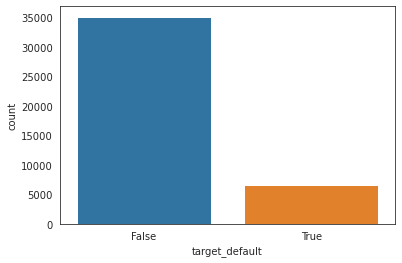

In [13]:
#plotar gráficos
sns.countplot(data=df_clean, x='target_default')

print(df_clean['target_default'].value_counts() / len(df_clean))

In [14]:
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,0.0,18.0,444,2,0.0,51.0,645,Invite-email,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,0.0,0.0,14.0,346,1,0.0,17.0,243,Radio-commercial,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,0.0,10.0,6,2,NaN,9.0,65,Waiting-list,163679.0
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,1.0,0.0,19.0,406,3,NaN,38.0,815,Waiting-list,1086.0
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,0.0,0.0,11.0,240,2,1.0,46.0,320,Invite-email,198618.0


In [15]:
(df_clean.isnull().sum()/len(df_clean)).sort_values(ascending=False)

last_amount_borrowed                               0.661412
last_borrowed_in_months                            0.661412
ok_since                                           0.586114
external_data_provider_credit_checks_last_year     0.335905
credit_limit                                       0.314056
facebook_profile                                   0.099495
marketing_channel                                  0.079251
external_data_provider_email_seen_before           0.049951
n_bankruptcies                                     0.003234
reported_income                                    0.001581
n_defaulted_loans                                  0.000287
score_6                                            0.000000
score_4                                            0.000000
score_3                                            0.000000
score_2                                            0.000000
score_1                                            0.000000
score_5                                 

Tratar valores nulos para variáveis núméricas

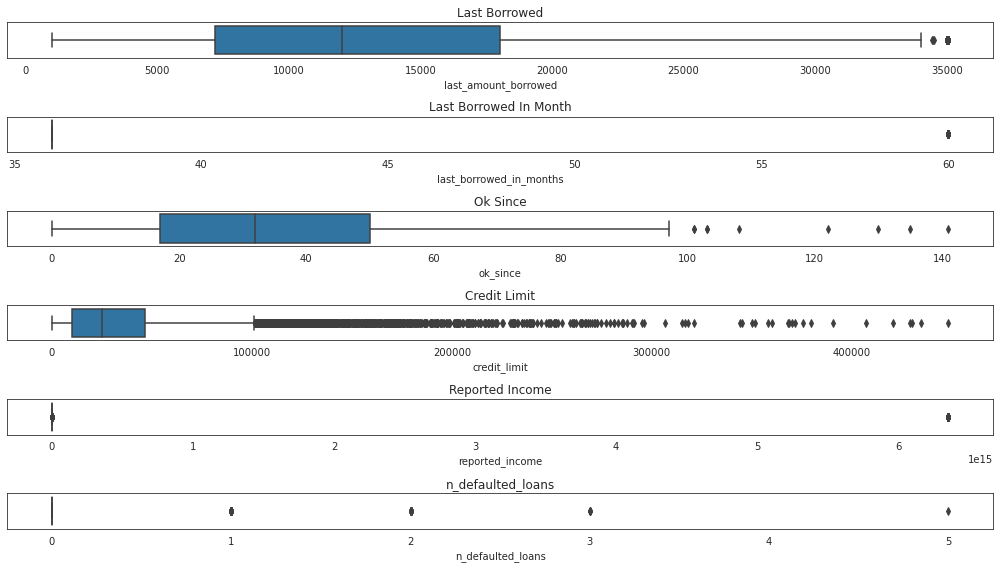

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(14,8))

sns.boxplot(data=df_clean, x='last_amount_borrowed', ax=ax1)
sns.boxplot(data=df_clean, x='last_borrowed_in_months', ax=ax2)
sns.boxplot(data=df_clean, x='ok_since', ax=ax3)
sns.boxplot(data=df_clean, x='credit_limit', ax=ax4)
sns.boxplot(data=df_clean, x='reported_income', ax=ax5)
sns.boxplot(data=df_clean, x='n_defaulted_loans', ax=ax6)


ax1.set_title('Last Borrowed')
ax2.set_title('Last Borrowed In Month')
ax3.set_title('Ok Since')
ax4.set_title('Credit Limit');
ax5.set_title('Reported Income');
ax6.set_title('n_defaulted_loans')
plt.tight_layout()

In [17]:
#completar valores nulos para as variáveis numéricas
df_clean['last_amount_borrowed'].fillna(df_clean['last_amount_borrowed'].mean(), axis=0, inplace=True)
df_clean['last_borrowed_in_months'].fillna(df_clean['last_borrowed_in_months'].mean(), axis=0, inplace=True)
df_clean['ok_since'].fillna(df_clean['ok_since'].mean(), axis=0, inplace=True)
df_clean['credit_limit'].fillna(df_clean['credit_limit'].median(), axis=0, inplace=True)
df_clean['external_data_provider_credit_checks_last_year'].fillna(df_clean['external_data_provider_credit_checks_last_year'].mean(), axis=0, inplace=True)                                
df_clean['reported_income'].fillna(df_clean['reported_income'].mean(), axis=0, inplace=True)      
df_clean['external_data_provider_email_seen_before'].fillna(df_clean['external_data_provider_email_seen_before'].mean(), axis=0, inplace=True)                                
df_clean['n_bankruptcies'].fillna(df_clean['n_bankruptcies'].mean(), axis=0, inplace=True)                                
df_clean['n_defaulted_loans'].fillna(df_clean['n_defaulted_loans'].mean(), axis=0, inplace=True)                                


In [18]:
df_clean['facebook_profile'].mode()
df_clean['marketing_channel'].mode()

0    Website
dtype: object

In [19]:
#completar valores nulos para as variáveis categóricas
df_clean['facebook_profile'].fillna(False, axis=0, inplace=True)                                
df_clean['marketing_channel'].fillna('Website', axis=0, inplace=True)                                

In [20]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
application_time_in_funnel                         0
external_data_provider_credit_checks_last_mont

In [21]:
df_clean['reported_income'].describe()

count    4.174100e+04
mean     1.052261e+13
std      2.581893e+14
min      4.030000e+02
25%      5.091000e+04
50%      1.016230e+05
75%      1.512480e+05
max      6.355500e+15
Name: reported_income, dtype: float64

A variável reported_income possi valores muito discrepantes, vamos substituir esses valores.

### 4.2 Preparando os dados para o modelo

In [22]:
df_norm = df_clean.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
var_num = df_clean.select_dtypes('float', 'int')
var_num = var_num.columns

In [24]:
df_norm[var_num] = scaler.fit_transform(df_norm[var_num].values)
df_norm.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,0.032154,0.563484,-0.832617,0.848870,1.039282,2.540549,-8.355353e-01,...,-0.279532,-0.057709,1.604337,444,2,-1.237427e+00,1.328615,645,Invite-email,-0.040756
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,0.213805,-0.924750,1.538588,-0.789902,-0.536149,0.000000,-1.293876e-15,...,-0.279532,-0.057709,0.732520,346,1,-1.237427e+00,-0.619019,243,Radio-commercial,-0.040756
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,0.122980,0.006361,-0.512003,1.294382,-0.043827,-1.328282,-8.355353e-01,...,-0.279532,-0.057709,-0.139296,6,2,2.724835e-16,-1.077285,65,Waiting-list,-0.040756
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,1.485366,0.500243,1.694857,-0.500560,0.251567,0.000000,-1.293876e-15,...,3.365154,-0.057709,1.822291,406,3,2.724835e-16,0.583931,815,Waiting-list,-0.040756
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,1.394540,-0.481355,0.114978,1.816579,-1.126935,0.000000,-1.293876e-15,...,-0.279532,-0.057709,0.078658,240,2,1.216886e+00,1.042198,320,Invite-email,-0.040756


Agora, vamos utilizar o labelEncoder em nossas variáveis categóricas.

In [25]:
encoder = LabelEncoder()

var_cat = ['score_1', 'score_2', 'facebook_profile', 'marketing_channel', 'target_default']


In [26]:
for col in var_cat:
    df_norm[col] = encoder.fit_transform(df_norm[col])

In [27]:
df_norm.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income
0,0,0,10,0.032154,0.563484,-0.832617,0.848870,1.039282,2.540549,-8.355353e-01,...,-0.279532,-0.057709,1.604337,444,2,-1.237427e+00,1.328615,645,2,-0.040756
1,0,3,16,0.213805,-0.924750,1.538588,-0.789902,-0.536149,0.000000,-1.293876e-15,...,-0.279532,-0.057709,0.732520,346,1,-1.237427e+00,-0.619019,243,5,-0.040756
2,1,3,9,0.122980,0.006361,-0.512003,1.294382,-0.043827,-1.328282,-8.355353e-01,...,-0.279532,-0.057709,-0.139296,6,2,2.724835e-16,-1.077285,65,7,-0.040756
3,0,0,21,1.485366,0.500243,1.694857,-0.500560,0.251567,0.000000,-1.293876e-15,...,3.365154,-0.057709,1.822291,406,3,2.724835e-16,0.583931,815,7,-0.040756
4,0,2,1,1.394540,-0.481355,0.114978,1.816579,-1.126935,0.000000,-1.293876e-15,...,-0.279532,-0.057709,0.078658,240,2,1.216886e+00,1.042198,320,2,-0.040756


In [68]:
corr = df_norm.corr()

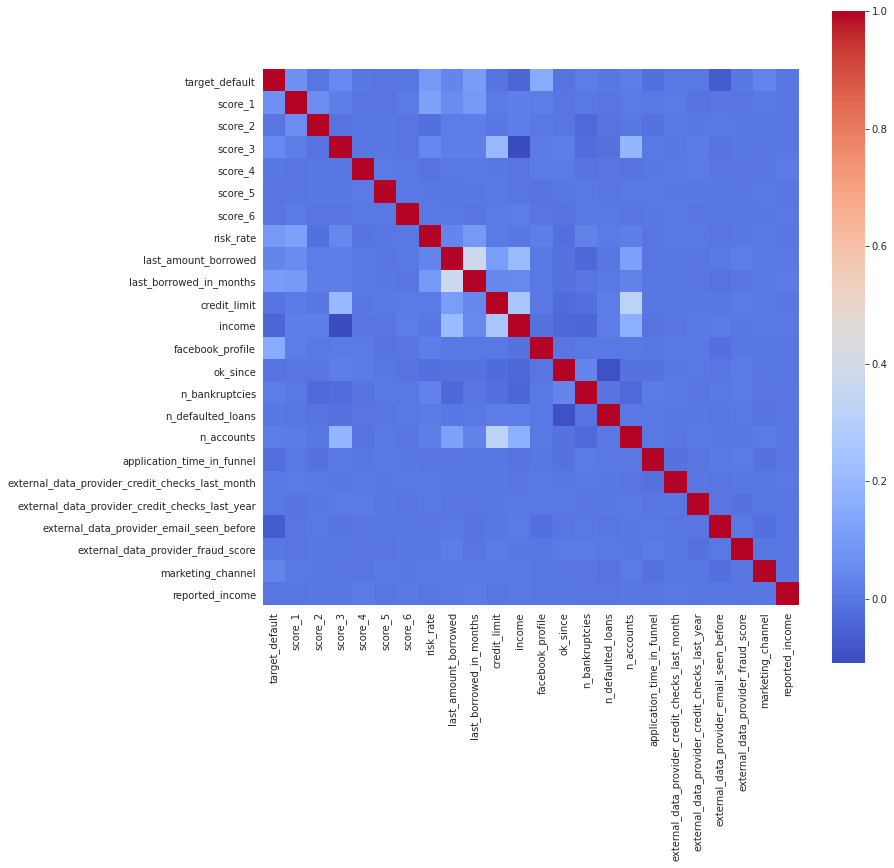

In [74]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, ax=ax, cmap='coolwarm');

### 5. Construindo o modelo base

In [28]:
!pip install scikit-plot -q

Importando as bibliotecas necessárias


In [29]:
#importar as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score


Para treina o modelo de Machine Learning é necessário dividir os dados entre Treino e Teste.

In [30]:
#separa dados alvo 
X = df_norm.drop('target_default', axis=1)
y = df_norm.target_default

# dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

Criando o modelo de base, que nos informará se os esforços de otimização estão valendo a pena.

In [31]:
from sklearn.tree import DecisionTreeClassifier

# construindo função de avaliação do baseline
def validation(X, y, model, quite=False):

    X = np.array(X)
    y = np.array(y)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    scores_recall = cross_val_score(model, X,y, scoring='recall')

    if quite == False:
        print("Acurácia de: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))
        print("Recall de: {:.3f} (+/- {:.2f})".format(scores_recall.mean(), scores_recall.std()))
           
    return scores.mean()

# criar baseline e ver desempenho
dt = DecisionTreeClassifier()
score_baseline = validation(X_train, y_train, dt) 

Acurácia de: 0.743 (+/- 0.00)
Recall de: 0.253 (+/- 0.02)


O modelo de Decision Tree possui uma acurácia de 0.743, porém, somente 0.253 de Recall.

### 5.2 Otimizando o modelo de machine learning

In [32]:
!pip install imbalanced-learn -q
!pip install delayed -q

Como vimos acima, os dados da variável alvo estão desbalanceados. Vamos balancear esses dados para que o modelo escolhido não tenha overfiting

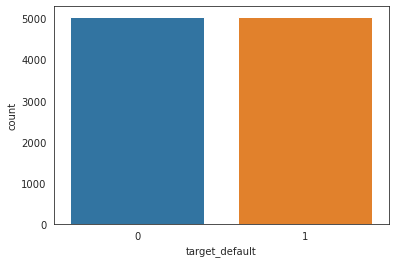

[5046 5046]


In [33]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

X_under, y_under = undersample.fit_resample(X_train, y_train)

sns.countplot(x=y_under)
plt.show()
print(np.bincount(y_under))

Com os dados balanceados, vamos testar alguns modelos e escolher qual possuir a melhor performance.

In [34]:
#modelos 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

svc = LinearSVC()
sgdc = SGDClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()


In [35]:
modelos = [svc, sgdc, lr, rf, dt]

for m in modelos:
    print(m.__class__.__name__)
    validation(X_under, y_under, m)
    print('\n')

LinearSVC
Acurácia de: 0.506 (+/- 0.01)
Recall de: 0.529 (+/- 0.38)


SGDClassifier
Acurácia de: 0.511 (+/- 0.01)
Recall de: 0.656 (+/- 0.38)


LogisticRegression
Acurácia de: 0.617 (+/- 0.01)
Recall de: 0.619 (+/- 0.01)


RandomForestClassifier
Acurácia de: 0.634 (+/- 0.01)
Recall de: 0.611 (+/- 0.01)


DecisionTreeClassifier
Acurácia de: 0.558 (+/- 0.01)
Recall de: 0.564 (+/- 0.01)




Baseado nos modelos testados, o modelo escolhido foi Logistic Regresssion. Vamos escolher os melhor parametros para ele.

### 5.3 Otimizando o modelo
Após escolher o modelo, agora é hora de selecionar os melhores parâmetros para aumentar a perfomance do modelo criado.

In [56]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 240,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
# 1. parametrizando o modelo
lr = LogisticRegression(random_state=20)

# 2. Grid Search
parameters = {'max_iter' : range(10,100,10)}

clf = GridSearchCV(lr, parameters, scoring='recall')
clf.fit(X_under, y_under)

print(clf.best_score_)
print(clf.best_params_)

0.6129633300297325
{'max_iter': 80}


Vemos que a melhor perfomance para o modelo é max_iter de 80. Agora, vamos parametrizar o modelo final.

In [63]:
lr = LogisticRegression(max_iter = 80)
validation(X_under, y_under, lr)

Acurácia de: 0.611 (+/- 0.01)
Recall de: 0.613 (+/- 0.02)


0.6114758653053671

              precision    recall  f1-score   support

           0       0.91      0.63      0.74      8821
           1       0.24      0.64      0.35      1615

    accuracy                           0.63     10436
   macro avg       0.57      0.63      0.55     10436
weighted avg       0.80      0.63      0.68     10436

Recall: 0.641

Acurácia: 0.630

AUC: 0.635



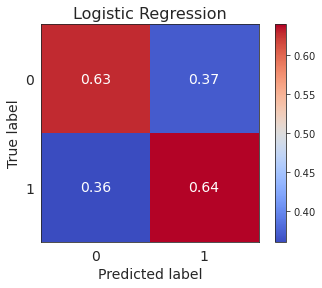

In [67]:
#1 importar modelos
lr = LogisticRegression(max_iter = 80, l1_ratio='l1')

#2 treinar modelo
lr.fit(X_under, y_under)

#3 ML nos dados de teste
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)

#4 Classification Report
print(classification_report(y_test, y_pred))
print("Recall: {:.3f}\n".format(recall_score(y_test, y_pred)))
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred)))
print("AUC: {:.3}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,
                                    title='Logistic Regression',
                                    title_fontsize=16,
                                    text_fontsize=14,
                                    cmap='coolwarm');

Quando usamos nosso modelo para realizar as previsões finais, ele possui uma acurácia de 0.63 e um Recall de 0.64. O recall é importante para prever de forma acertiva o cliente que será default.

### Conclusão

Nesse projeto entendemos a importância de classificação dos clientes que serão possíveis default, dessa forma, reduzindo os problemas com a inadimplência futura. Utilizando um conjunto de dados abertos disponíveis na internet, foi realizado uma análise, tratamento e preparação dos dados para treinamento do modelo de machine learning. 

Após isso, nosso modelo foi testado e validado na base de teste, para que então fosse utilizado na base de testes e verificamos sua performance. Durante esse projeto vimos em uma menor escala uma parte do processo que ocorre na maioria das instituições financeiras, obviamente, o processo real de uma previsão de default envolve outros diversos fatores e otimizações constantes dos algorítimos por parte das instituições.